This section we use Bag of Visual Words model to classify images of skin cancers

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
#from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

Read in the HMNIST dataset. Each datapoint is a 28 by 28 grayscale image

In [3]:
#hmnist_dataset = pd.read_csv("hmnist_28_28_L.csv").to_numpy()
hmnist_dataset = pd.read_csv("hmnist_28_28_L.csv").values

In [4]:
# viewcolumn(columnvector);
# VIEWCOLUMN Displays a 28 x 28 grayscale image stored in a column vector.
# Tim Marks 2002

def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([28,28], order='F'), cmap=plt.get_cmap('gray'))

In [7]:
def get_visual_words(image, kmeans_model, patch_size=patch_size):
    patches = extract_patches_2d(image.reshape([28,28]), (patch_size, patch_size))
    visual_words = kmeans_model.predict(patches.reshape([len(patches),patch_size*patch_size]))
    hist, _ = np.histogram(visual_words, bins=range(kmeans_model.n_clusters))

    return hist

In [8]:
def images_to_patches(images, patch_size):
    patches = []
    for i in range(len(images)):
        image_patches = extract_patches_2d(images[i].reshape([28,28]), (patch_size, patch_size))
        for patch in image_patches:
            patches.append(patch)
    return np.array(patches)

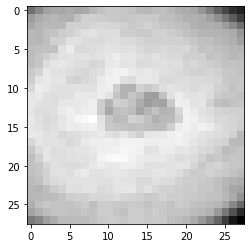

In [9]:
viewcolumn(hmnist_dataset[8][0:784])

Split the data set into training (75%), validation (15%), and test (10%)

In [10]:
dimension = 784
hmnist_X = hmnist_dataset.T[0:dimension].T
hmnist_y  = hmnist_dataset.T[dimension].T

# First split the whole dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(hmnist_X, hmnist_y, test_size=0.25)
# Then split the test dataset into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.4)

Below is the hyperparameters for this model. They can be tuned to get better prediction results

In [11]:
patch_size = 8
n_clusters = 10
knn_neighbors = 20
#c= 3

In [12]:
#Extract 2D patches (features) from the image
patches = images_to_patches(X_train,patch_size)
#Run KMeans on the extracted patches
kmeans_model = MiniBatchKMeans(n_clusters=n_clusters, random_state=0).fit(patches.reshape([len(patches),patch_size*patch_size]))
#Get visual words for all the images (use kmeans features to label each training image)
X_train_hist = [get_visual_words(image, kmeans_model, patch_size) for image in X_train]
#Train the trained histograms with training label using SVM
#clf = SVC(C=c,gamma='auto')
#clf.fit(X_train_hist,y_train)
knn_model = KNN(n_jobs=-1,n_neighbors=knn_neighbors,weights='uniform')
knn_model.fit(X_train_hist,y_train)

#Test validation accuracy
X_valid_hist = [get_visual_words(image, kmeans_model, patch_size) for image in X_valid]
#valid_pred = clf.predict(X_valid_hist)
valid_pred = knn_model.predict(X_valid_hist)
valid_result = []
for i in range(len(y_valid)):
    if (y_valid[i] == valid_pred[i]):
        valid_result.append(1)
    else:
        valid_result.append(0)
valid_accuracy = sum(valid_result) / len(y_valid)

print("Validation accuracy is %f" %valid_accuracy)

Validation accuracy is 0.683755


In [13]:
#Test test accuracy
X_test_hist = [get_visual_words(image, kmeans_model, patch_size) for image in X_test]
#test_pred = clf.predict(X_test_hist)
test_pred = knn_model.predict(X_test_hist)
test_result = []
for i in range(len(y_test)):
    if (y_test[i] == test_pred[i]):
        test_result.append(1)
    else:
        test_result.append(0)
test_accuracy = sum(test_result) / len(y_test)

print("Test accuracy is %f" %test_accuracy)

Test accuracy is 0.669661
